# Summarise the previous results: clean and add the volume and dual computation functions, validate the results


In p. iiib the main conclusion we found is that the boundary method should not work because our assumption about the primary boundary edges only being connected to two tetrahedron does not hold, it is only true that there are two boundary tetrahera, but there might be more internal ones.  

For now we investigate why compute_vd does not work in some cases such as the star refinement, for we start with random numbers to see how often it fails.

In [1]:

from scipy.spatial import Delaunay
#import polyscope as ps

# ddg imports
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Imports and physical parameters
# std library

# plotting
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# ddg imports
# Allow for relative imports from main library:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

#from ddgclib._case1 import *
from hyperct import *
from ddgclib._capillary_rise import * #plot_surface#, curvature
from ddgclib._misc import *
from ddgclib._plotting import *

# compute duals (and Delaunay dual from a set of points)
from ddgclib.ddgclib.barycentric import compute_vd

# Plots
from ddgclib.ddgclib.barycentric import plot_dual_mesh_3D

# Geometry and dual computations

# Boundary geometry                  
from ddgclib.ddgclib.barycentric import  _set_boundary


# Area computations

# Volume computations (including helper functions)


# DDG gradient operations on primary edges (for continuum)

def incom_Poi(domain, refinements=2):
    """
    Compute the triangulate of a 2D incompressible Poiseuile flow
    """
    HC = Complex(2, domain)
    HC.triangulate()
    for i in range(refinements):
        HC.refine_all()

    points = []
    for v in HC.V:
        points.append(v.x_a)
    points = np.array(points, dtype='float64')
    tri = Delaunay(points)
    return points



def plot_complex_3d_mat(points):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.spatial import Delaunay
    
    np.random.seed(180)
    points = np.random.rand(10, 3)
    
    tri = Delaunay(points)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2])
    
    colors = plt.cm.tab20(np.linspace(0, 1, len(tri.simplices)))
    
    for i, s in enumerate(tri.simplices):
        tetrahedron = points[s]
        facets = [[tetrahedron[0], tetrahedron[1], tetrahedron[2]],
                  [tetrahedron[0], tetrahedron[1], tetrahedron[3]],
                  [tetrahedron[0], tetrahedron[2], tetrahedron[3]],
                  [tetrahedron[1], tetrahedron[2], tetrahedron[3]]]
        collection = Poly3DCollection(facets, alpha=0.1)
        face_color = colors[i]
        collection.set_facecolor(face_color)
        edge_color = (1, 1, 1)  # Make edges less visible
        collection.set_edgecolor(edge_color)
        ax.add_collection3d(collection)
    
        # Plot edges
        edges = [[tetrahedron[0], tetrahedron[1]],
                 [tetrahedron[0], tetrahedron[2]],
                 [tetrahedron[0], tetrahedron[3]],
                 [tetrahedron[1], tetrahedron[2]],
                 [tetrahedron[1], tetrahedron[3]],
                 [tetrahedron[2], tetrahedron[3]]]
        for edge in edges:
            ax.plot3D(*zip(edge[0], edge[1]), color='k', linewidth=0.5)



Volume of Parallelepiped=0.16666666666666666


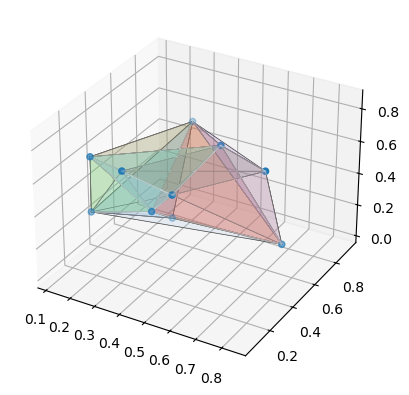

In [2]:
np.random.seed(65961961)
np.random.seed(55418484)  # Good-ish seed
points = np.random.rand(8, 3)
plot_complex_3d_mat(points)

In [3]:
#np.random.seed(180)
%matplotlib notebook
tri = Delaunay(points, qhull_options='Qz')
HC = Complex(3)
for t in tri.simplices:
    for v1ai in t:
        v1a = tri.points[v1ai]
        v1 = HC.V[tuple(v1a)]
        for v2ai in t:
            v2a = tri.points[v2ai]
            v2 = HC.V[tuple(v2a)]
            v1.connect(v2)
            
plot_complex_3d_mat(points)
#HC.plot_complex()
HC.V.merge_all(cdist =1e-12)

bV = HC.boundary()
#bV = boundary_3D(HC)
bV
for v in HC.V:
    v.boundary = False
    v.boundary = True
    

compute_vd(HC, cdist =1e-12)

#len(list(bV_old)), len(list(bV))#, compute_vd(HC, cdist =1e-12)

<IPython.core.display.Javascript object>

In [4]:
#np.random.seed(180)
%matplotlib notebook
#np.random.seed(65961961)
#np.random.seed(55418484)  # Good-ish seed
points = np.random.rand(12, 3)

tri = Delaunay(points, qhull_options='Qz')
HC = Complex(3)
for t in tri.simplices:
    for v1ai in t:
        v1a = tri.points[v1ai]
        v1 = HC.V[tuple(v1a)]
        for v2ai in t:
            v2a = tri.points[v2ai]
            v2 = HC.V[tuple(v2a)]
            v1.connect(v2)
            
#
#HC.plot_complex()
HC.V.merge_all(cdist =1e-12)

bV = HC.boundary()
#bV = boundary_3D(HC)
bV
for v in HC.V:
    v.boundary = False
for v in bV:
    v.boundary = True
    

compute_vd(HC, cdist =1e-12)

#plot_complex_3d_mat(points)

#len(list(bV_old)), len(list(bV))#, compute_vd(HC, cdist =1e-12)

In [5]:
# Add dual points
dual_points = []
for vd in HC.Vd:
    dual_points.append(vd.x_a)

dual_points = np.array(dual_points, dtype='float64')
#hcaxes.scatter(dual_points)
plot_dual_mesh_3D(HC, dual_points)

<IPython.core.display.Javascript object>

In [6]:
#plot_dual(v, HC)
#ps.show()


# New formulation

Note that despite the fact that the above code runs without error, there are probably missing dual vertices on the boundaries (due to the two tetrahedra assumption which is not always valid) and this might be why the later flux plane computations are not working as expected. For example in the code below some of the triangles are missing despite the fact that  

In [7]:
# New function:
def compute_vd(HC, cdist=1e-10):
    """
    Computes the dual vertices of a primal vertex cache HC.V on
    each dim - 1 simplex.

    Currently only dim = 2, 3 is supported

    cdist: float, tolerance for where a unique dual vertex can exist

    """
    # Construct dual cache
    HC.Vd = VertexCacheField()

    # Construct dual neighbour sets
    for v in HC.V:
        v.vd = set()

    # hcv = copy.copy(HC.V)
    if HC.dim == 2:
        for v1 in HC.V:
            for v2 in v1.nn:
                # If boundary vertex, we stop and generate a new vertex on the boundary edge.
                try:
                    if v1.boundary and v2.boundary:
                        cd = v1.x_a + 0.5 * (v2.x_a - v1.x_a)
                        vd = HC.Vd[tuple(cd)]
                        v1.vd.add(vd)
                        v2.vd.add(vd)
                        # Connect to dual simplex
                        v1nn_u_v2nn = v1.nn.intersection(v2.nn)  # Should always be length 1
                        v3 = list(v1nn_u_v2nn)[0]
                        verts = np.zeros([3, HC.dim])
                        verts[0] = v1.x_a
                        verts[1] = v2.x_a
                        verts[2] = v3.x_a
                        cd1 = np.mean(verts, axis=0)
                        vd1 = HC.Vd[tuple(cd1)]
                        # Connect the two dual vertices forming the boundary dual edge:
                        vd.connect(vd1)
                        continue
                except AttributeError:
                    pass
                # Find all v2.nn also connected to v1:
                v1nn_u_v2nn = v1.nn.intersection(v2.nn)  # Should always be length 2
                # In 2D there are only two
                v3_1 = list(v1nn_u_v2nn)[0]
                v3_2 = list(v1nn_u_v2nn)[1]
                if (v3_1 is v1) or (v3_2 is v1):
                    continue
                verts = np.zeros([3, HC.dim])
                verts[0] = v1.x_a
                verts[1] = v2.x_a
                verts[2] = v3_1.x_a
                # Compute the circumcentre:
                # cd = circumcenter(verts)
                # Compute the barycentre of the first connected triangle sharing primary edge/face e_1e:
                cd1 = np.mean(verts, axis=0)

                # Compute the barycentre of the first connected triangle sharing primary edge/face e_1e:
                verts[2] = v3_2.x_a
                cd2 = np.mean(verts, axis=0)
                # Note instead of below, could round off cd in general to say nearest 1e-12
                # Check for uniqueness first (new, expensive, could
                # be improved by checking duals of neighbours only?):
                for vd_i in HC.Vd:
                    dist1 = np.linalg.norm(vd_i.x_a - cd1)
                    dist2 = np.linalg.norm(vd_i.x_a - cd2)
                    if dist1 < cdist:
                        cd1 = vd_i.x_a
                    if dist2 < cdist:
                        cd2 = vd_i.x_a

                vd1 = HC.Vd[tuple(cd1)]
                vd2 = HC.Vd[tuple(cd2)]
                # Connect the two dual vertices:
                vd1.connect(vd2)

                # Connect to all primal vertices of v3_1 dual
                for v in [v1, v2, v3_1]:
                    v.vd.add(vd1)

                # Connect to all primal vertices of v3_2 dual
                for v in [v1, v2, v3_2]:
                    v.vd.add(vd2)

    elif HC.dim == 3:
        for v1 in HC.V:
            for v2 in v1.nn:
                # Note: every boundary primary edge only has two boundary tetrahedra connected
                # and therefore only two barycentric dual points. We do not need to connect with
                # other duals therefore simply connect to the primary edges.
                
                # Turn this off for now see what we have:
                if 0:
                    if v1.boundary and v2.boundary:
                        # Find all v2.nn also connected to v1:
                        # Find the other two primary edges
                        v1nn_u_v2nn = v1.nn.intersection(v2.nn)
                        for v3 in v1nn_u_v2nn:
                            if (v3 is v1):
                                continue
                            if v3.boundary:
                                # Find the barycentre of the triangle
                                verts = np.zeros([3, HC.dim])
                                verts[0] = v1.x_a  # TODO: Added 08.03.24, investigate accidental deletion?
                                verts[1] = v2.x_a
                                verts[2] = v3.x_a
                                # Compute the circumcentre:
                                # cd = circumcenter(verts)
                                # Compute the barycentre:
                                cd = np.mean(verts, axis=0)
                                for vd_i in HC.Vd:
                                    dist = np.linalg.norm(vd_i.x_a - cd)
                                    if dist < cdist:
                                        cd = vd_i.x_a
    
                                # Define the new dual vertex on the face/triangle [v1, v2, v3]:
                                vd123 = HC.Vd[tuple(cd)]
    
                                # Find the simplex that connects to boundary face/triangle [v1, v2, v3]:
                                v1nn_u_v2nn_u_v3nn = v1.nn.intersection(v2.nn).intersection(
                                    v3.nn)  # Always length 1
                                v4 = list(v1nn_u_v2nn_u_v3nn)[0]
    
                                verts = np.zeros([4, HC.dim])
                                verts[0] = v1.x_a
                                verts[1] = v2.x_a
                                verts[2] = v3.x_a
                                verts[3] = v4.x_a
                                cd1234 = np.mean(verts, axis=0)
                                vd1234 = HC.Vd[tuple(cd1234)]
                                # Connect the two dual vertices forming the boundary dual edge:
                                vd123.connect(vd1234)
    
                                # Connect to all primal vertices on the boundary:
                                # TODO: CHECK IF ALL THE CONNECTIONS BELOW ARE CORRECT:
                                for v in [v1, v2, v3, v4]:
                                    if not v.boundary:
                                        continue
                                    v.vd.add(vd123)
                                    vd123.nn.add(v)
    
                                # Connect the dual of e_12 to vd1234
                                if 1:
                                    cd12 = v1.x_a + 0.5 * (v2.x_a - v1.x_a)
                                    vd12 = HC.Vd[tuple(cd12)]
                                if 0:
                                    vd1234.connect(vd12)
                                # Connect vd123 with duals of primary edges e_12 and e_13
                                if 1:
                                   # cd12 = v1.x_a + 0.5 * (v2.x_a - v1.x_a)
                                   # vd12 = HC.Vd[tuple(cd12)]
    
                                    # cd13 = v1.x_a + 0.5 * (v3.x_a - v1.x_a)
                                    # vd13 = HC.Vd[tuple(cd13)]
    
                                    # Close out on primary border edges:
                                    # vd123.connect(vd12)
                                    # vd123.connect(vd13)
    
                                    # Also connect to primary edges
                                    v1.vd.add(vd12)
                                    v2.vd.add(vd12)
                                # v1.vd.add(vd13)
                                # v2.vd.add(vd13)
                        continue
                    

                if 0:
                    #if v1.boundary and v2.boundary:
                    # Find all v2.nn also connected to v1:
                    v1nn_u_v2nn = v1.nn.intersection(v2.nn)
                    for v3 in v1nn_u_v2nn:
                        if (v3 is v1):
                            continue
                            
                        v1nn_u_v2nn_u_v3nn = v1nn_u_v2nn.intersection(v3.nn)  # Should be length 2
                        # print(f'len(v1nn_u_v2nn_u_v3nn) = {len(v1nn_u_v2nn_u_v3nn)}')
                        # In 3D there are only two
                        v4_1 = list(v1nn_u_v2nn_u_v3nn)[0]
                        if (v4_1 is v1) or (v4_1 is v2) or (v4_2 is v1) or (v4_2 is v2):
                            continue
    
                        # Compute the two duals of tetrahedra connected by face f_123 of triangle [v1, v2, v3]
                        verts = np.zeros([HC.dim + 1, HC.dim])
                        verts[0] = v1.x_a  # TODO: Added 08.03.24, investigate accidental deletion?
                        verts[1] = v2.x_a
                        verts[2] = v3.x_a
                        verts[3] = v4_1.x_a
                        #  Compute the barycentre of the first connected simplex sharing primary face f_123:
                        cd1 = np.mean(verts, axis=0)
    
                        # Check if 
                        # 
                        # 
                        # Compute the barycentre of the second connected simplex sharing primary face f_123:
                        
                        v4_2 = list(v1nn_u_v2nn_u_v3nn)[1]
                        verts[3] = v4_2.x_a
                        cd2 = np.mean(verts, axis=0)
    
                        # Note instead of below, could round off cd in general to say nearest 1e-12
                        # Check for uniqueness first (new, expensive, could
                        # be improved by checking duals of neighbours only?):
                        if 0:
                            for vd_i in HC.Vd:
                                dist1 = np.linalg.norm(vd_i.x_a - cd1)
                                dist2 = np.linalg.norm(vd_i.x_a - cd2)
                                if dist1 < cdist:
                                    cd1 = vd_i.x_a
                                if dist2 < cdist:
                                    cd2 = vd_i.x_a
    
                        #  Define the new dual vertices
                        vd1 = HC.Vd[tuple(cd1)]
                        vd2 = HC.Vd[tuple(cd2)]
                        # Connect the two dual vertices:
                        vd1.connect(vd2)
    
                        # Connect to all primal vertices of v3_1 dual
                        for v in [v1, v2, v3, v4_1]:
                            v.vd.add(vd1)
    
                        # Connect to all primal vertices of v3_2 dual
                        for v in [v1, v2, v3, v4_2]:
                            v.vd.add(vd2)

                # Find all v2.nn also connected to v1:
                v1nn_u_v2nn = v1.nn.intersection(v2.nn)
                for v3 in v1nn_u_v2nn:
                    if (v3 is v1):
                        continue
                        
                    v1nn_u_v2nn_u_v3nn = v1nn_u_v2nn.intersection(v3.nn)  # Should be length 2, unless the triangle is on the boundary
                    v4_1 = list(v1nn_u_v2nn_u_v3nn)[0]
                    #v4_2 = list(v1nn_u_v2nn_u_v3nn)[1]
                    
                    #if (v4_1 is v1) or (v4_1 is v2) or (v4_2 is v1) or (v4_2 is v2):
                    #    continue
                    
                    # debug above, should never occur?:
                    if 1:
                        if (v4_1 is v1) or (v4_1 is v2):
                            print(f'WARNING (v4_1 is v1) or (v4_1 is v2)')

                    # Compute the two duals of tetrahedra connected by face f_123 of triangle [v1, v2, v3]
                    verts = np.zeros([HC.dim + 1, HC.dim])
                    verts[0] = v1.x_a  # TODO: Added 08.03.24, investigate accidental deletion?
                    verts[1] = v2.x_a
                    verts[2] = v3.x_a
                    verts[3] = v4_1.x_a
                    #  Compute the barycentre of the first connected simplex sharing primary face f_123:
                    cd1 = np.mean(verts, axis=0)
                    
                    # If v123 is on the boundary then we instead want to generate the barycenter
                    # dual vd123 and then connect it to edge dual vd12 and cd1
                    if (v1.boundary and v2.boundary) and v3.boundary:
                        # debug print:
                        if len(list(v1nn_u_v2nn_u_v3nn)) > 1:
                            print(f'WARNING: len(list(v1nn_u_v2nn_u_v3nn)) = {len(list(v1nn_u_v2nn_u_v3nn))} which is > expected 1')
                        
                        #verts_b = np.zeros([3, HC.dim]) 
                        verts_b = verts[:3]
                        cd2 = np.mean(verts_b, axis=0)
                        
                        # Connect the dual of e_12 primal edge vertices
                        cd12 = v1.x_a + 0.5 * (v2.x_a - v1.x_a)
                        vd12 = HC.Vd[tuple(cd12)]
                        v1.vd.add(vd12)
                        v2.vd.add(vd12)
                        
                    # Compute the barycentre of the second connected simplex sharing primary face f_123:
                    else:
                        v4_2 = list(v1nn_u_v2nn_u_v3nn)[1]
                        verts[3] = v4_2.x_a
                        cd2 = np.mean(verts, axis=0)
                        
                        # debug above, should never occur?:
                        if 1:
                            if (v4_2 is v1) or (v4_2 is v2):
                                print(f'WARNING (v4_1 is v1) or (v4_1 is v2)')

                    # Note instead of below, could round off cd in general to say nearest 1e-12
                    # Check for uniqueness first (new, expensive, could
                    # be improved by checking duals of neighbours only?):
                    if 0:
                        for vd_i in HC.Vd:
                            dist1 = np.linalg.norm(vd_i.x_a - cd1)
                            dist2 = np.linalg.norm(vd_i.x_a - cd2)
                            if dist1 < cdist:
                                cd1 = vd_i.x_a
                            if dist2 < cdist:
                                cd2 = vd_i.x_a

                    #  Define the new dual vertices
                    vd1 = HC.Vd[tuple(cd1)]
                    vd2 = HC.Vd[tuple(cd2)]
                    # Connect the two dual vertices:
                    vd1.connect(vd2)

                    # Connect to all primal vertices of v3_1 dual
                    for v in [v1, v2, v3, v4_1]:
                        v.vd.add(vd1)

                    # Connect to all primal vertices of v3_2 dual
                    if (v1.boundary and v2.boundary) and v3.boundary:
                        for v in [v1, v2, v3]:  # v4_2 doesn't exist on boundary face
                            v.vd.add(vd2)
                    else:
                        for v in [v1, v2, v3, v4_2]:
                            v.vd.add(vd2)


    return HC  # self



In [8]:
def plot_dual(v, HC, vector_field=None, scalar_field=None, fn='', up="x_up"
              , stl=False):
    v1 = v
    # Initialize polyscope
    ps.init()
    ps.set_up_dir('z_up')
    do = coldict['do']
    lo = coldict['lo']
    db = coldict['db']
    lb = coldict['lb']
    tg = coldict['tg']  # Tab:green colour
    # %% Plot Barycentric dual mesh
    # Loop over primary edges
    dual_points_set = set()
    ssets = []  # Sets of simplices
    v1 = v
    for i, v2 in enumerate(v1.nn):
        # Find the dual vertex of e12:
        vc_12 = 0.5 * (v2.x_a - v1.x_a) + v1.x_a  # TODO: Should be done in the compute_vd function
        vc_12 = HC.Vd[tuple(vc_12)]

        # Find local dual points intersecting vertices terminating edge:
        dset = v2.vd.intersection(v1.vd)  # Always 5 for boundaries
        # Start with the first vertex and then build triangles, loop back to it:
        vd_i = list(dset)[0]
        if v1.boundary and v2.boundary:
            print(f'len(dset) = {len(dset)}')
            # Remove the boundary edge which should already be in the set:
            if not (len(vd_i.nn.intersection(dset)) == 1):
                for vd in dset:
                    vd_i = vd
                    if len(vd_i.nn.intersection(dset)) == 1:
                        break
            #iter_len = 3
            # The set length much be different because all interior planes
            # are counted minus two boudary vertices which do not form triangles
            # such as the flux planes in the bulk
            iter_len = len(list(dset)) - 2 
        else:
            iter_len = len(list(dset))
        
        
        # Main loop
        dsetnn = vd_i.nn.intersection(dset)  # Always 1 internal dual vertices
        vd_j = list(dsetnn)[0]
        # NOTE: In the boundary edges the last triangle does not have
        #      a final vd_j
        for _ in range(iter_len):  # For boundaries should be length 2?
            ssets.append([vc_12, vd_i, vd_j])
            dsetnn_k = vd_j.nn.intersection(dset)  # Always 2 internal dual vertices in interior
            #print(f'dsetnn_k = {dsetnn_k}')
            dsetnn_k.remove(vd_i)  # Should now be size 1
            vd_i = vd_j
            try:
                # Alternatively it should produce an IndexError only when
                # _ = 2 (end of range(3) and we are on a boundary edge
                # so that (v1.boundary and v2.boundary) is true
                vd_j = list(dsetnn_k)[0]  # Retrieve the next vertex
            except IndexError:
                pass  # Should only happen for boundary edges

        # Find local dual points intersecting vertices terminating edge:
        dset = v2.vd.intersection(v1.vd)
        pi = []
        for vd in dset:
            # pi.append(vd.x + 1e-9 * np.random.rand())
            pi.append(vd.x)
            dual_points_set.add(vd.x)
        pi = np.array(pi)
        pi_2d = pi[:, :2] + 1e-9 * np.random.rand()

        # Plot dual points:
        dual_points = []
        for vd in dual_points_set:
            dual_points.append(vd)

        dual_points = np.array(dual_points)
        ps_cloud = ps.register_point_cloud("Dual points", dual_points)
        ps_cloud.set_color(do)

    # Build the simplices for plotting
    faces = []
    vdict = collections.OrderedDict()  # Ordered cache of vertices to plot
    ind = 0
    # Now iterate through all the constructed simplices and find indexes
    for s in ssets:
        f = []
        for v in s:
            if not (v.x in vdict):
                vdict[v.x] = ind
                ind += 1

            f.append(vdict[v.x])
        faces.append(f)

    verts = np.array(list(vdict.keys()))
    faces = np.array(faces)

    dsurface = ps.register_surface_mesh(f"Dual face {i}", verts, faces,
                                        color=do,
                                        edge_width=0.0,
                                        edge_color=(0.0, 0.0, 0.0),
                                        smooth_shade=False)

    # Plot primary mesh
    HC.dim = 2  # The dimension has changed to 2 (boundary surface)
    HC.vertex_face_mesh()
    points = np.array(HC.vertices_fm)
    triangles = np.array(HC.simplices_fm_i)

    # %% Register the primary vertices as a point cloud
    # `my_points` is a Nx3 numpy array
    my_points = points
    ps_cloud = ps.register_point_cloud("Primary points", my_points)
    ps_cloud.set_color(tuple(db))
    # ps_cloud.set_color((0.0, 0.0, 0.0))
    verts = my_points
    faces = triangles
    if stl:
        #  msh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
        for i, f in enumerate(faces):
            for j in range(3):
                pass
                # msh.vectors[i][j] = verts[f[j], :]

        # msh.save(f'{fn}.stl')

    ### Plot the primary mesh
    # `verts` is a Nx3 numpy array of vertex positions
    # `faces` is a Fx3 array of indices, or a nested list
    if 1:
        surface = ps.register_surface_mesh("Primary surface", verts, faces,
                                           color=db,
                                           edge_width=1.0,
                                           edge_color=(0.0, 0.0, 0.0),
                                           smooth_shade=False)

        surface.set_transparency(0.3)
        # Add a scalar function and a vector function defined on the mesh
        # vertex_scalar is a length V numpy array of values
        # face_vectors is an Fx3 array of vectors per face

        # View the point cloud and mesh we just registered in the 3D UI
        # ps.show()
        # Plot particles
        # Ground plane options
        ps.set_ground_plane_mode("shadow_only")  # set +Z as up direction
        ps.set_ground_plane_height_factor(0.1)  # adjust the plane height
        ps.set_shadow_darkness(0.2)  # lighter shadows
        ps.set_shadow_blur_iters(2)  # lighter shadows
        ps.set_transparency_mode('pretty')
        # ps.look_at((0., -10., 0.), (0., 0., 0.))
        ps.look_at((1., -8., -8.), (0., 0., 0.))
        # ps.set_ground_plane_height_factor(x, is_relative=True)
        ps.set_screenshot_extension(".png")
        # Take a screenshot
        # It will be written to your current directory as screenshot_000000.jpg, etc
        ps.screenshot(fn)
    return ps



In [9]:
ub = 4.0
domain = [(0, ub),]*3
#symmetry = [0, 1, 1]
HC = Complex(3, domain=domain, symmetry=None)
HC.triangulate()
for i in range(1):
    HC.refine_all()
    

# NEW
# Compute boundaries
bV = set()
for v in HC.V:
    if ((v.x_a[0] == 0.0 or v.x_a[1] == 0.0 or v.x_a[2] == 0.0) or
        (v.x_a[0] == ub or v.x_a[1] == ub or v.x_a[2] == ub)):
        bV.add(v)
        
for bv in bV:
    _set_boundary(bv, True)
for v in HC.V:
    if not (v in bV):
        _set_boundary(v, False)
        
# Compute duals     
compute_vd(HC, cdist =1e-10)

# Add dual points
dual_points = []
for vd in HC.Vd:
    dual_points.append(vd.x_a)

dual_points = np.array(dual_points, dtype='float64')
#hcaxes.scatter(dual_points)
#plot_dual_mesh_3D(HC, dual_points)
#dual_points

import polyscope as ps
v = HC.V[(0.0, 0.0, 0.0)]
v2 = HC.V[(0.0, ub, ub)]
#TEST fix of dual point:

#vi = HC.V[(2.0, 2.0, 2.0)]
#plot_dual(vi, HC)
#ps.show()

vi = HC.V[(2.0, 0.0, 2.0)]
plot_dual(vi, HC)



[polyscope] Backend: openGL3_glfw -- Loaded openGL version: 3.3.0 NVIDIA 555.58
len(dset) = 5
len(dset) = 5
len(dset) = 5
len(dset) = 5
len(dset) = 7
len(dset) = 7
len(dset) = 7
len(dset) = 7


<module 'polyscope' from '/home/endres/anaconda3/envs/ddg/lib/python3.11/site-packages/polyscope/__init__.py'>

In [10]:
ps.show()

In [11]:
vi = HC.V[(0.0, 0.0, 0.0)]
plot_dual(vi, HC)
#ps.show()

len(dset) = 5
len(dset) = 5
len(dset) = 5
len(dset) = 5
len(dset) = 5
len(dset) = 5


<module 'polyscope' from '/home/endres/anaconda3/envs/ddg/lib/python3.11/site-packages/polyscope/__init__.py'>

In [12]:
vi = HC.V[(2.0, 2.0, 2.0)]
plot_dual(vi, HC)
ps.show()

In [13]:
for vd in vi.vd:
    print(f'vd = {vd.x}')

vd = (3.25, 2.25, 2.75)
vd = (3.25, 2.75, 1.75)
vd = (1.75, 0.75, 1.25)
vd = (2.25, 2.75, 0.75)
vd = (0.75, 2.75, 2.25)
vd = (2.25, 2.75, 3.25)
vd = (3.25, 1.75, 2.75)
vd = (0.75, 1.25, 1.75)
vd = (2.25, 3.25, 2.75)
vd = (3.25, 2.25, 1.25)
vd = (1.75, 1.25, 3.25)
vd = (1.75, 1.25, 0.75)
vd = (2.75, 3.25, 1.75)
vd = (1.25, 0.75, 2.25)
vd = (1.25, 3.25, 2.25)
vd = (1.75, 2.75, 0.75)
vd = (1.75, 2.75, 3.25)
vd = (2.25, 1.25, 0.75)
vd = (2.25, 0.75, 2.75)
vd = (0.75, 2.25, 2.75)
vd = (0.75, 2.75, 1.75)
vd = (3.25, 1.25, 2.25)
vd = (3.25, 1.75, 1.25)
vd = (1.25, 2.25, 0.75)
vd = (1.25, 1.75, 3.25)
vd = (1.25, 2.25, 3.25)
vd = (1.25, 1.75, 0.75)
vd = (1.75, 3.25, 2.75)
vd = (2.25, 3.25, 1.25)
vd = (0.75, 1.75, 2.75)
vd = (2.75, 0.75, 2.25)
vd = (2.75, 3.25, 2.25)
vd = (1.25, 0.75, 1.75)
vd = (1.25, 3.25, 1.75)
vd = (3.25, 2.75, 2.25)
vd = (1.75, 0.75, 2.75)
vd = (2.75, 1.75, 0.75)
vd = (2.25, 0.75, 1.25)
vd = (2.75, 2.25, 0.75)
vd = (3.25, 1.25, 1.75)
vd = (2.75, 1.75, 3.25)
vd = (2.75, 2.25

# Now test again on random points:


In [14]:
#np.random.seed(180)
%matplotlib notebook
tri = Delaunay(points, qhull_options='Qz')
HC = Complex(3)
for t in tri.simplices:
    for v1ai in t:
        v1a = tri.points[v1ai]
        v1 = HC.V[tuple(v1a)]
        for v2ai in t:
            v2a = tri.points[v2ai]
            v2 = HC.V[tuple(v2a)]
            v1.connect(v2)
            
plot_complex_3d_mat(points)
#HC.plot_complex()
HC.V.merge_all(cdist =1e-12)

bV = HC.boundary()
#bV = boundary_3D(HC)
bV
for v in HC.V:
    v.boundary = False
for v in bV:
    v.boundary = True
    

compute_vd(HC, cdist =1e-12)

#len(list(bV_old)), len(list(bV))#, compute_vd(HC, cdist =1e-12)

<IPython.core.display.Javascript object>

In [15]:
plot_dual(v, HC)
ps.show()

len(dset) = 13


KeyError: <ddgclib._vertex.VertexScalarField object at 0x708dbc098b10>

In [ ]:
for v in HC.V:
    print(v.boundary)

# Old code:


In [ ]:
dual_points = []
for vd in HC.Vd:
    dual_points.append(vd.x_a)

dual_points = np.array(dual_points, dtype='float64')
#hcaxes.scatter(dual_points)
plot_dual_mesh_3D(HC, dual_points)

In [ ]:
for vd in HC.Vd:
    print(vd.x)